In [1]:
from tasks.model import FacialLandmarkDetector
from libs import dp, eval
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
model = FacialLandmarkDetector()
checkpoint_path = "data/checkpoint_model/cp-{epoch:04d}.ckpt"
epoch = 100
model.load_weights(checkpoint_path.format(epoch=epoch))

Model: "FacialLandmarkDetector"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(16, 256, 256, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_194 (Conv2D)             (16, 128, 128, 64)   9472        input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_184 (BatchN (16, 128, 128, 64)   256         conv2d_194[0][0]                 
__________________________________________________________________________________________________
tf.nn.relu_5 (TFOpLambda)       (16, 128, 128, 64)   0           batch_normalization_184[0][0]    
_____________________________________________________________________________

In [4]:
eval_300W = dp.Dataset(256, 64, 68, '../Data/300W/eval.csv')
generator = eval_300W.gen_eval()

Train dataset: ../Data/300W/eval.csv
Train dataset is loaded. Shape: (600, 2)


In [5]:
error = 0.
for img, kps, center, scale in tqdm(generator, desc='Evaluation'):
    pred = model.predict(np.array([img]))[0]
    kps = kps * 256 / 64
    pred_kps = eval.parse_heatmap(pred) * 256 / 64
    error += eval.l2_distance(pred_kps, kps)
    # break
error = error / 600
print(error)

Evaluation: 600it [01:13,  8.21it/s]

6.920267378912045


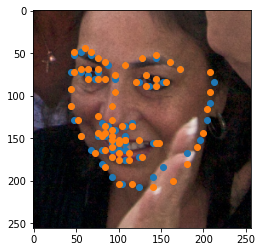

In [7]:
plt.scatter(pred_kps[:,0], pred_kps[:,1])
plt.scatter(kps[:,0], kps[:,1])
plt.imshow(img)

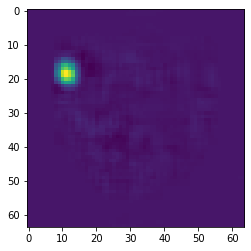

In [8]:
plt.imshow(pred[:,:,0])